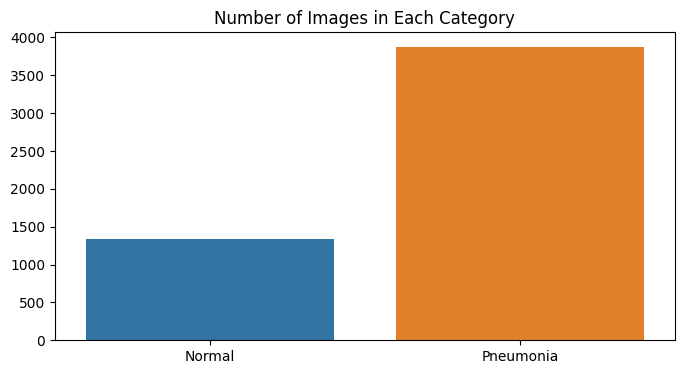

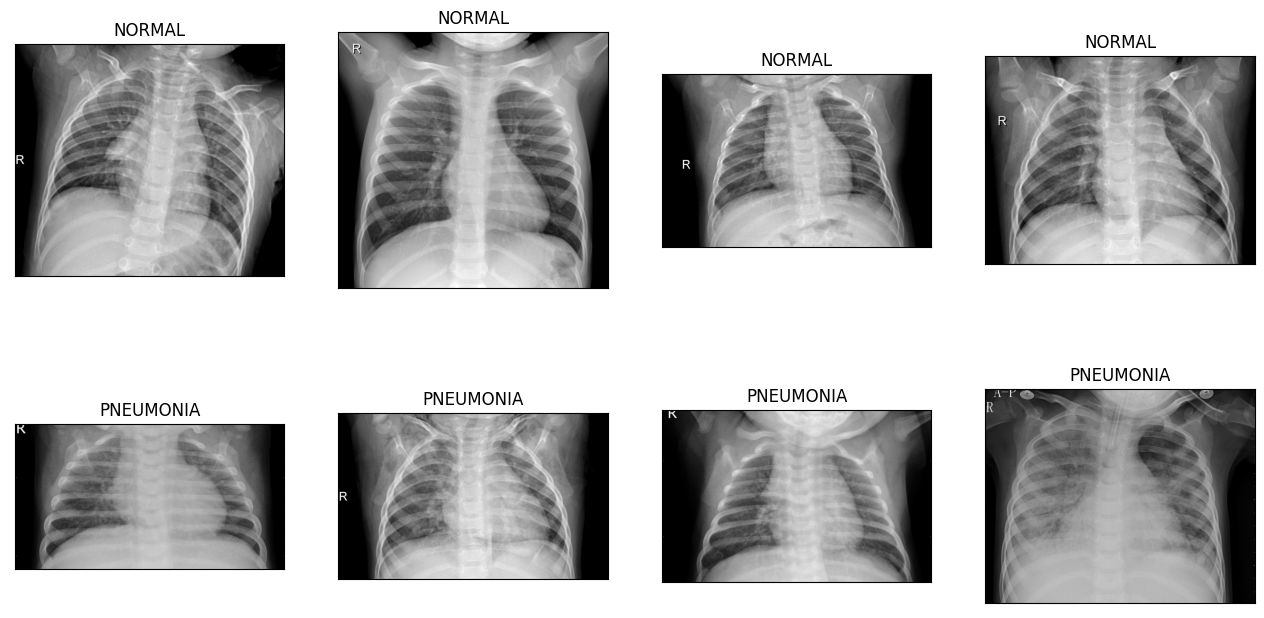

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fastai.vision.all import *

#Analyze the data

data_dir = 'train'

# Plot the number of images in each category
normal_count = len(os.listdir(os.path.join(data_dir, 'NORMAL')))
pneumonia_count = len(os.listdir(os.path.join(data_dir, 'PNEUMONIA')))
plt.figure(figsize=(8, 4))
sns.barplot(x=['Normal', 'Pneumonia'], y=[normal_count, pneumonia_count])
plt.title('Number of Images in Each Category')
plt.show()

# Display some sample images
normal_files = os.listdir(os.path.join(data_dir, 'NORMAL'))
pneumonia_files = os.listdir(os.path.join(data_dir, 'PNEUMONIA'))
sample_normal_files = np.random.choice(normal_files, 4, replace=False)
sample_pneumonia_files = np.random.choice(pneumonia_files, 4, replace=False)
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i, filename in enumerate(sample_normal_files):
    img = plt.imread(os.path.join(data_dir, 'NORMAL', filename))
    axs[0, i].imshow(img, cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[0, i].set_title('NORMAL')
for i, filename in enumerate(sample_pneumonia_files):
    img = plt.imread(os.path.join(data_dir, 'PNEUMONIA', filename))
    axs[1, i].imshow(img, cmap='gray')
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[1, i].set_title('PNEUMONIA')
plt.show()

In [61]:
path = Path('')

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=parent_label,
                   item_tfms=[Resize(460, method='pad'),
                              RandomResizedCrop(224, min_scale=0.5)],
                   batch_tfms=[*aug_transforms(flip_vert=True,
                                               max_lighting=0.1,
                                               max_zoom=1.05,
                                               max_warp=0.),
                               Normalize.from_stats(*imagenet_stats)])


In [62]:
dls = dblock.dataloaders(path/'train', bs=64)


In [63]:
metrics = [accuracy, F1Score(), Precision(), Recall()]
learn = cnn_learner(dls, resnet50, loss_func=CrossEntropyLossFlat(), metrics=metrics)
learn.fine_tune(10, 1e-3)


C:\Users\Bekhzod\anaconda3\envs\nlp_course\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\Bekhzod\anaconda3\envs\nlp_course\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\Bekhzod\anaconda3\envs\nlp_course\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  w

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.653252,0.506896,0.891659,0.922443,0.983895,0.868217,08:20


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.394614,0.413719,0.923298,0.945946,0.991501,0.904393,09:40
1,0.309609,0.149345,0.965484,0.976864,0.971867,0.981912,09:43
2,0.250931,0.217303,0.954938,0.968936,0.991881,0.947028,09:39
3,0.172922,0.084786,0.975072,0.983204,0.983204,0.983204,09:39
4,0.144641,0.160611,0.970278,0.979619,0.997323,0.962532,09:39
5,0.112841,0.079891,0.973154,0.981935,0.980670,0.983204,09:38
6,0.096054,0.073557,0.982742,0.988327,0.992188,0.984496,09:40
7,0.078280,0.070240,0.979866,0.986390,0.989597,0.983204,09:38
8,0.066619,0.080131,0.979866,0.986355,0.992157,0.980620,09:38
9,0.069569,0.075850,0.979866,0.986355,0.992157,0.980620,09:41


In [64]:
test_dl = dls.test_dl(get_image_files(path/'test'))
preds, _ = learn.get_preds(dl=test_dl)

binary_preds = preds.argmax(dim=-1)

In [70]:
df = pd.read_csv('sample_solution.csv')
df['labels'] = binary_preds

#Save the DataFrame to a CSV file

df.to_csv('solutionn.csv', index=False)

df.head(10)

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
5,test_img_10006.jpeg,1
6,test_img_10007.jpeg,0
7,test_img_10008.jpeg,1
8,test_img_10009.jpeg,0
9,test_img_10010.jpeg,1
